In [3]:
# import all functions from the EDA script
import sys
import os
sys.path.append(os.path.abspath('../scripts'))
from EDA import (load_and_prepare_data, 
                describe_variables, 
                segment_users, 
                basic_metrics, 
                non_graphical_univariate_analysis, 
                correlation_analysis, 
                graphical_univariate_analysis, 
                bivariate_analysis,
                correlation_analysis,
                dimensionality_reduction)

In [4]:
# Load and prepare data
query = """
SELECT * FROM xdr_data
"""
data = load_and_prepare_data(query)


c:\Users\Tsega KisPay\Documents\GitHub\telleco_test\scripts\load_data.py:38: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


In [5]:
description, data_types = describe_variables(data)
print("Variable Description:\n", description)
print("Data Types:\n", data_types)

Variable Description:
            Bearer Id           Start       Start ms             End  \
count   1.490100e+05          150000  150000.000000          150000   
unique           NaN            9997            NaN            6403   
top              NaN  4/26/2019 7:25            NaN  4/25/2019 0:01   
freq             NaN             203            NaN            1150   
mean    1.013887e+19             NaN     499.188200             NaN   
std     2.893173e+18             NaN     288.611834             NaN   
min     6.917538e+18             NaN       0.000000             NaN   
25%     7.349883e+18             NaN     250.000000             NaN   
50%     7.349883e+18             NaN     499.000000             NaN   
75%     1.304243e+19             NaN     749.000000             NaN   
max     1.318654e+19             NaN     999.000000             NaN   

               End ms     Dur. (ms)          IMSI  MSISDN/Number  \
count   150000.000000  1.500010e+05  1.494310e+05   1.48

In [6]:
decile_data = segment_users(data)
print("Decile Data:\n", decile_data)

Decile Data:
    decile  total_duration    total_data
0       0    2.946156e+08  7.438374e+12
1       1    5.397871e+08  7.445197e+12
2       2    8.649972e+08  7.478623e+12
3       3    2.779989e+09  1.614182e+13
4       4    1.077437e+09  6.087404e+12
5       5    1.536439e+09  7.438004e+12
6       6    1.985004e+09  7.416929e+12
7       7    2.467169e+09  7.458742e+12
8       8    4.145847e+09  7.459600e+12


In [7]:
metrics = basic_metrics(data)
print("Basic Metrics:\n", metrics)

Basic Metrics:
           Bearer Id       Start ms         End ms     Dur. (ms)          IMSI  \
count  1.490100e+05  150000.000000  150000.000000  1.500010e+05  1.494310e+05   
mean   1.013887e+19     499.188200     498.800880  1.046079e+05  2.082016e+14   
std    2.893173e+18     288.611834     288.097653  8.103780e+04  2.148809e+10   
min    6.917538e+18       0.000000       0.000000  0.000000e+00  2.040471e+14   
25%    7.349883e+18     250.000000     251.000000  5.743600e+04  2.082014e+14   
50%    7.349883e+18     499.000000     500.000000  8.639900e+04  2.082015e+14   
75%    1.304243e+19     749.000000     750.000000  1.324300e+05  2.082018e+14   
max    1.318654e+19     999.000000     999.000000  1.859336e+06  2.140743e+14   

       MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
count   1.489350e+05  1.494290e+05    122172.000000    122189.000000   
mean    4.188282e+10  4.847455e+13       109.795706        17.662883   
std     2.447443e+12  2.241637e+13    

In [8]:
dispersion_params = non_graphical_univariate_analysis(data)
print("Dispersion Parameters:\n", dispersion_params)

Dispersion Parameters:
                                                   mean           std  \
Bearer Id                                 1.013887e+19  2.893173e+18   
Start ms                                  4.991882e+02  2.886118e+02   
End ms                                    4.988009e+02  2.880977e+02   
Dur. (ms)                                 1.046079e+05  8.103780e+04   
IMSI                                      2.082016e+14  2.148809e+10   
MSISDN/Number                             4.188282e+10  2.447443e+12   
IMEI                                      4.847455e+13  2.241637e+13   
Avg RTT DL (ms)                           1.097957e+02  6.197827e+02   
Avg RTT UL (ms)                           1.766288e+01  8.479352e+01   
Avg Bearer TP DL (kbps)                   1.330005e+04  2.397188e+04   
Avg Bearer TP UL (kbps)                   1.770429e+03  4.625356e+03   
TCP DL Retrans. Vol (Bytes)               2.080991e+07  1.825665e+08   
TCP UL Retrans. Vol (Bytes)             

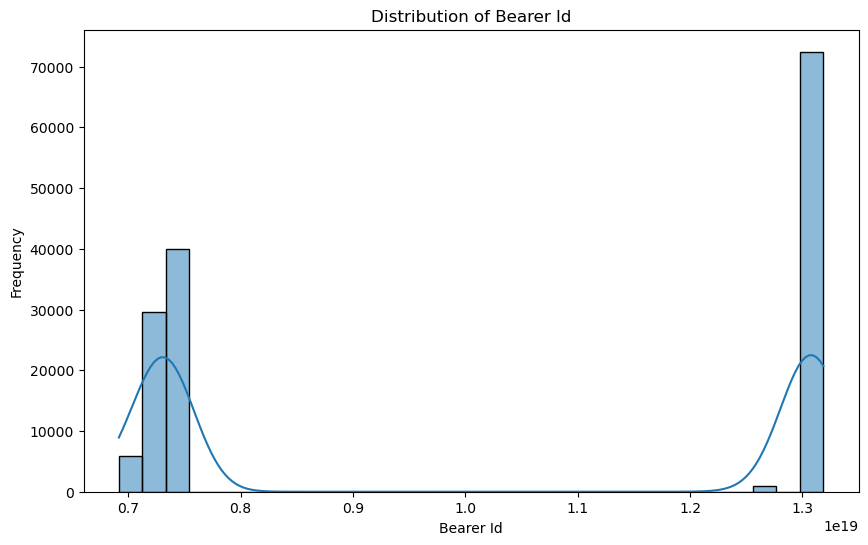

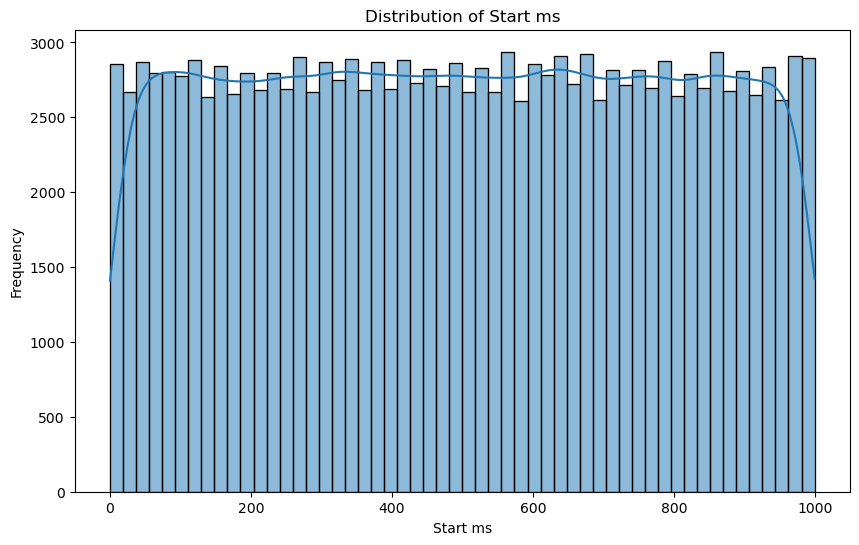

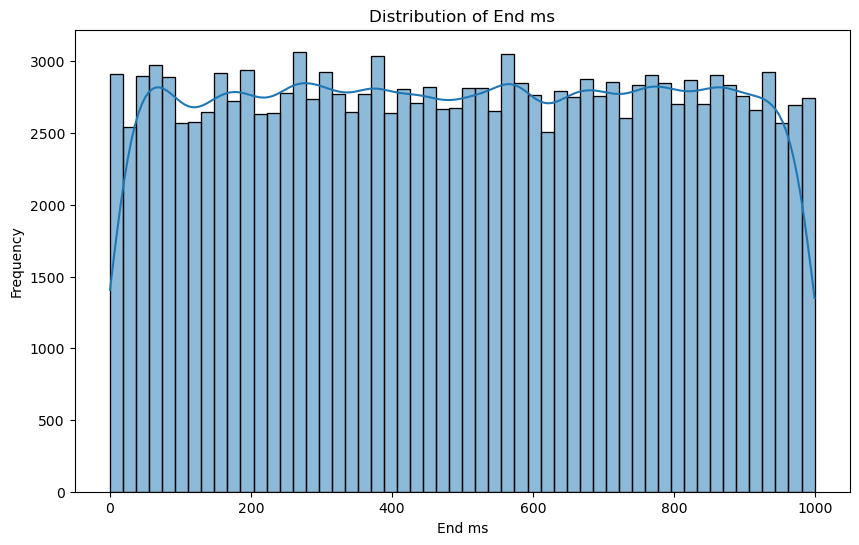

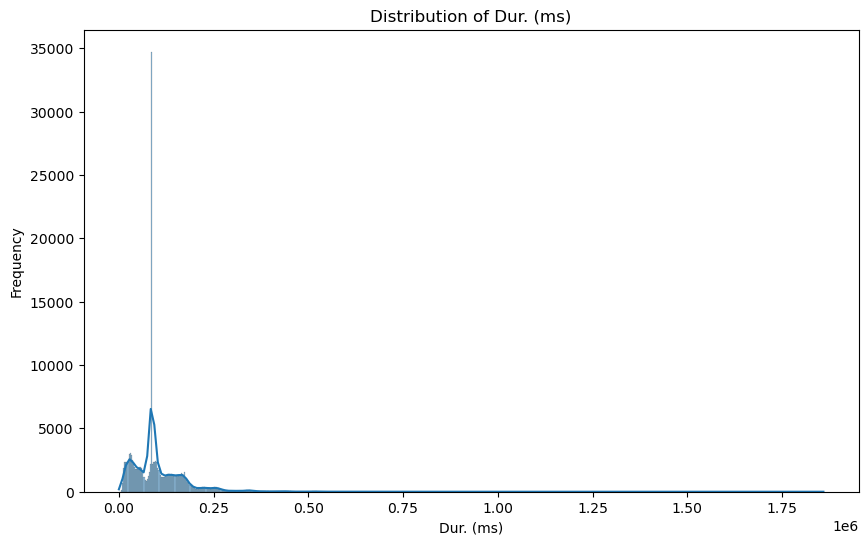

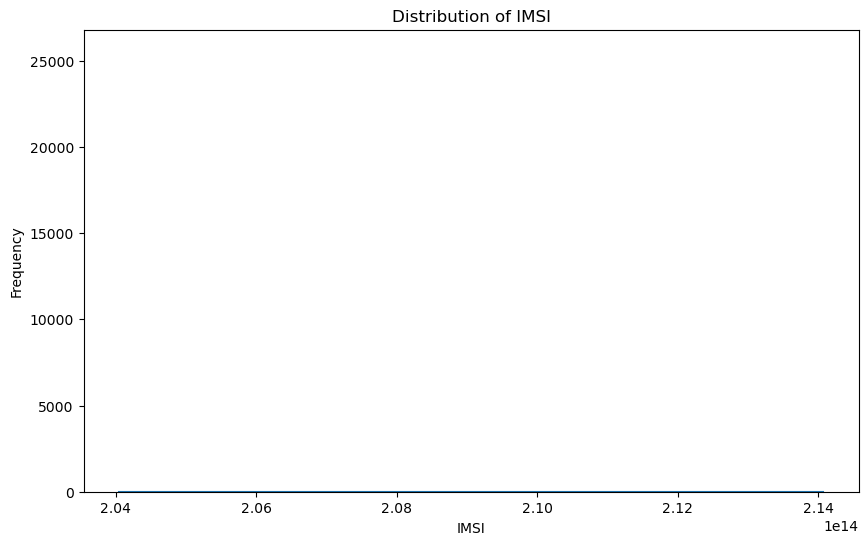

MemoryError: Unable to allocate 5.41 GiB for an array with shape (726371575,) and data type int64

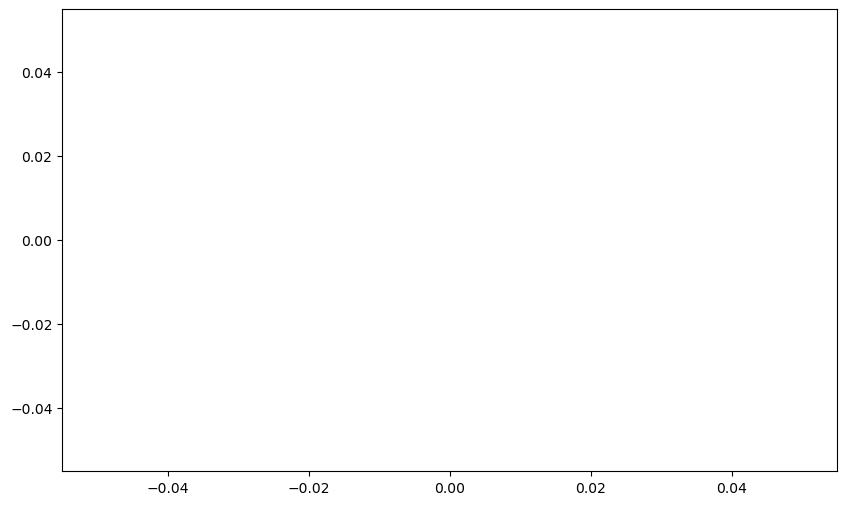

In [9]:
graphical_univariate_analysis(data)

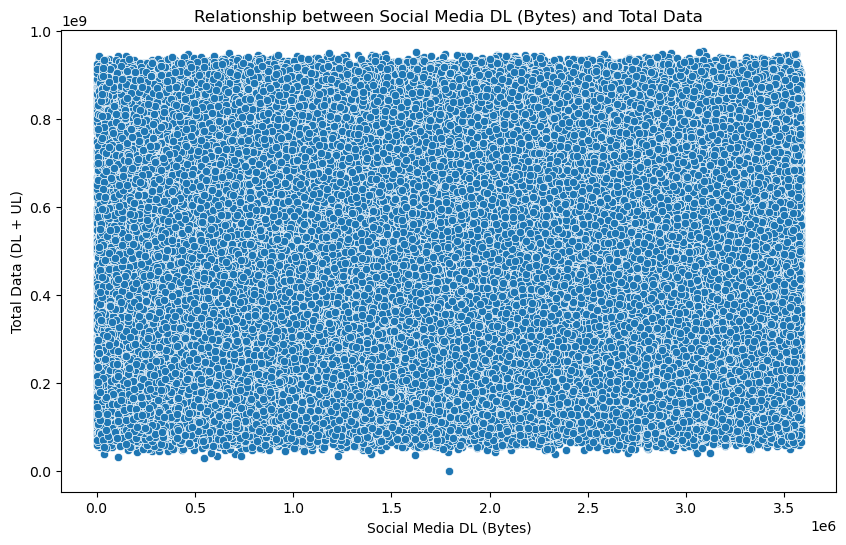

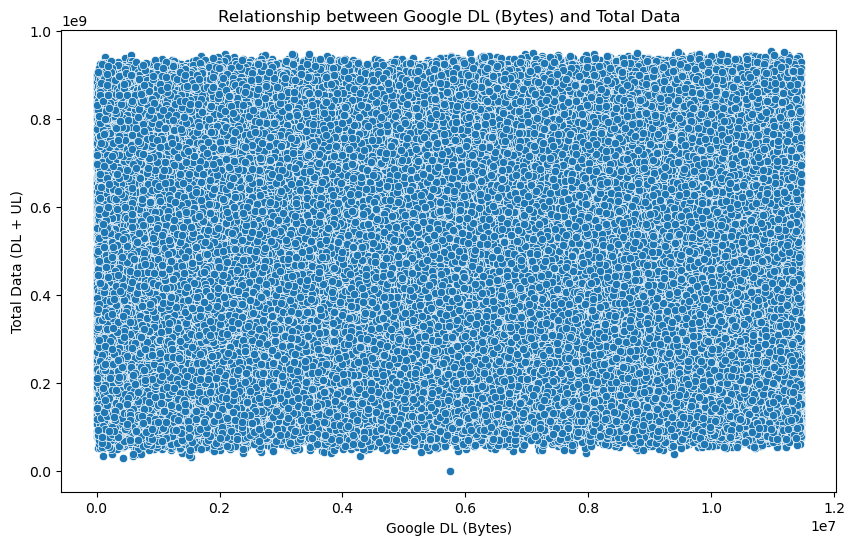

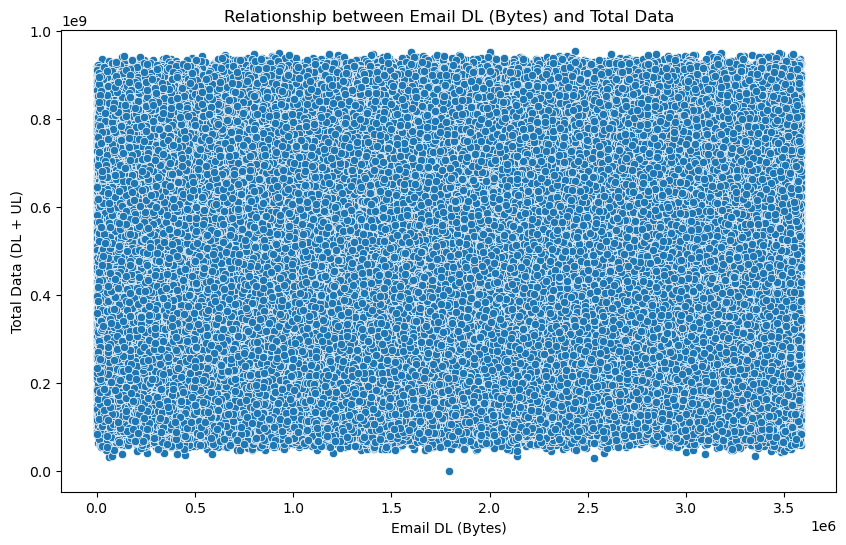

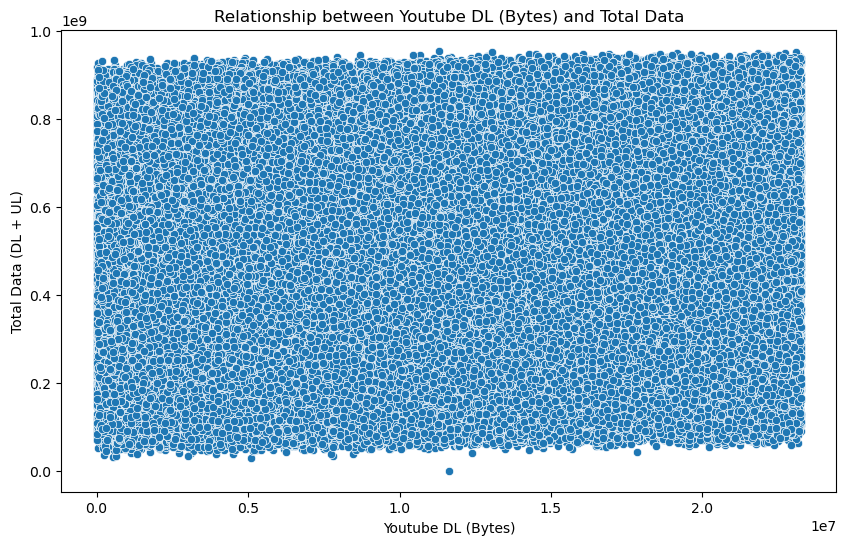

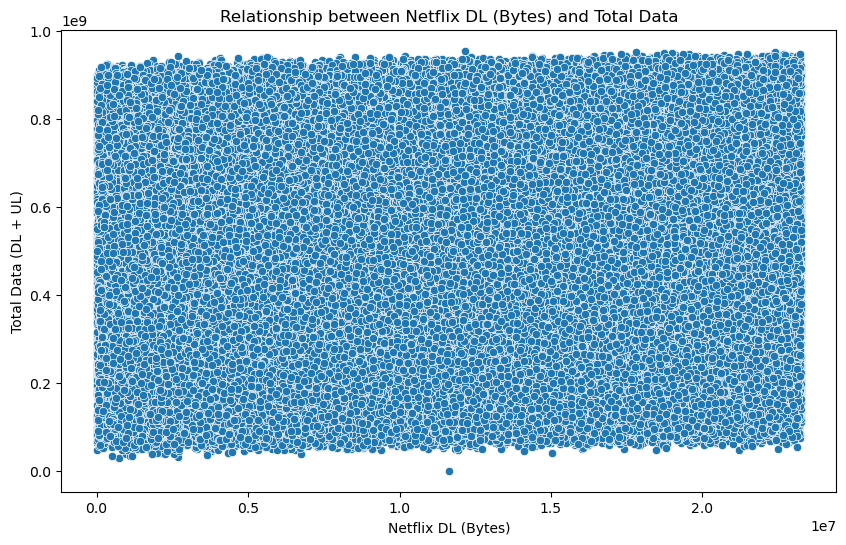

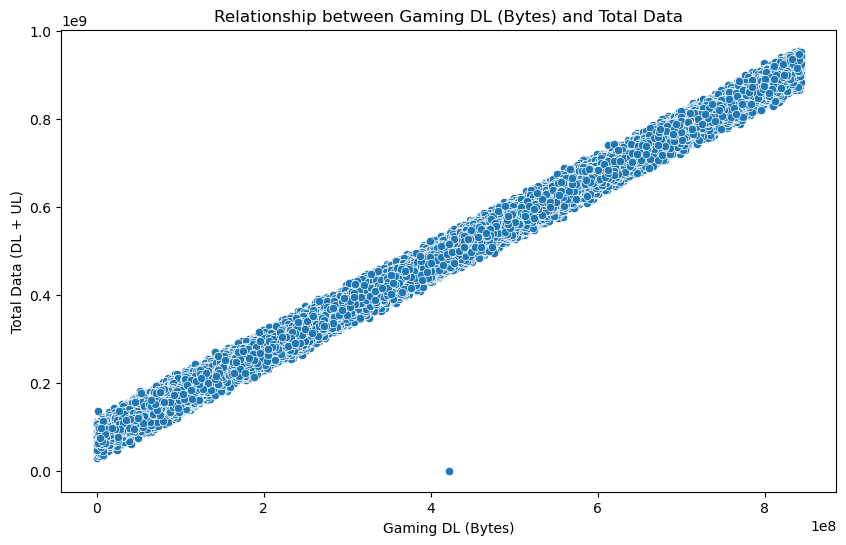

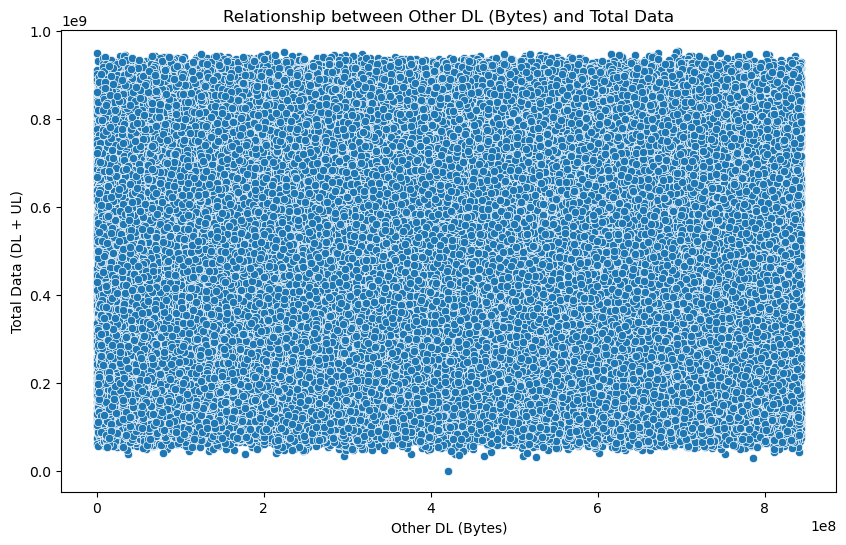

In [10]:
bivariate_analysis(data)

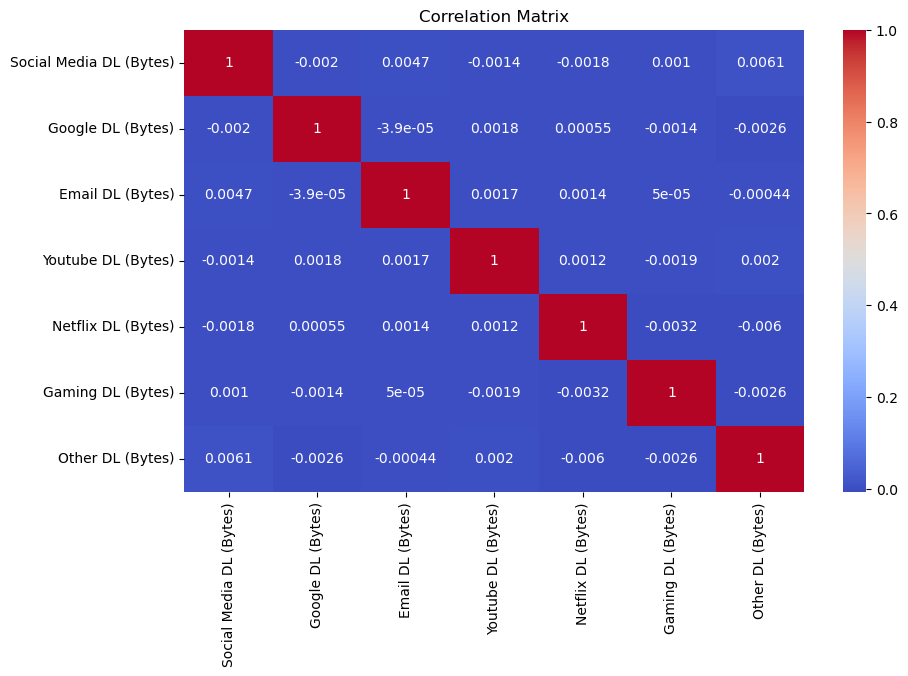

Correlation Matrix:
                          Social Media DL (Bytes)  Google DL (Bytes)  \
Social Media DL (Bytes)                 1.000000          -0.001954   
Google DL (Bytes)                      -0.001954           1.000000   
Email DL (Bytes)                        0.004745          -0.000039   
Youtube DL (Bytes)                     -0.001389           0.001760   
Netflix DL (Bytes)                     -0.001817           0.000548   
Gaming DL (Bytes)                       0.001018          -0.001421   
Other DL (Bytes)                        0.006126          -0.002557   

                         Email DL (Bytes)  Youtube DL (Bytes)  \
Social Media DL (Bytes)          0.004745           -0.001389   
Google DL (Bytes)               -0.000039            0.001760   
Email DL (Bytes)                 1.000000            0.001679   
Youtube DL (Bytes)               0.001679            1.000000   
Netflix DL (Bytes)               0.001351            0.001202   
Gaming DL (Bytes)   

In [11]:
correlation_matrix = correlation_analysis(data)
print("Correlation Matrix:\n", correlation_matrix)

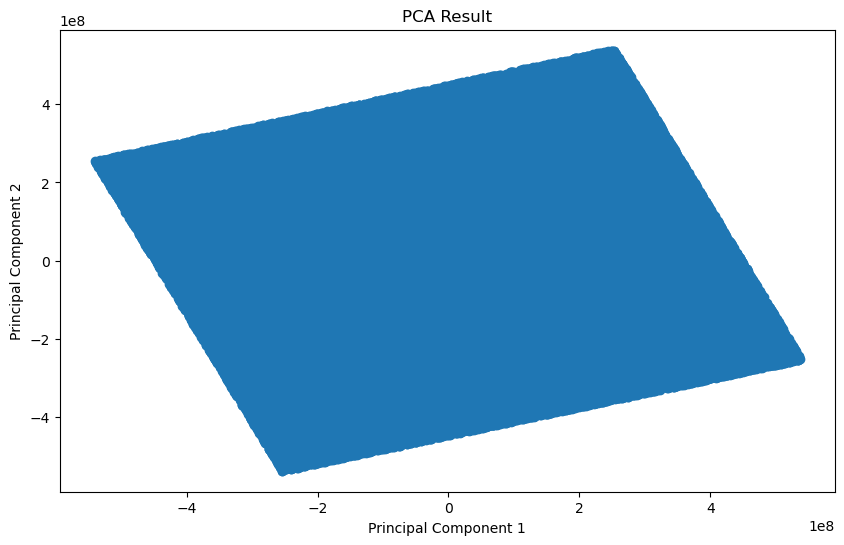

PCA Result:
 [[-5.09351276e+07 -2.83387943e+08]
 [ 1.39798227e+08  1.62816724e+08]
 [-1.77543876e+08 -7.50185124e+07]
 ...
 [ 2.25383543e+08 -2.37681041e+08]
 [-1.98790895e+08  3.46763915e+08]
 [-2.38418579e-07 -4.76837158e-07]]
Explained Variance:
 [0.501595   0.49753482]


In [12]:
pca_result, explained_variance = dimensionality_reduction(data)
print("PCA Result:\n", pca_result)
print("Explained Variance:\n", explained_variance)